# Определение перспективного тарифа для телеком компании

Мне предоставлены данные с пользователями 2х тарифов. Необходимо проанализировать активность клиентов в разрезе тарифов, и определить более перспективный тариф для маркетинговой кампании.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP3\\calls.csv')
internet = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP3\\internet.csv')
messages = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP3\\messages.csv')
tariffs = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP3\\tariffs.csv')
users = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP3\\users.csv')

In [3]:
print('Изучаем файл "calls"')
display(calls.head(5)), calls.info()
print('\nИзучаем файл "internet"')
display(internet.head(5)), internet.info()
print('\nИзучаем файл "messages"')
display(messages.head(5)), messages.info()
print('\nИзучаем файл "tariffs"')
display(tariffs.head(5)), tariffs.info()
print('\nИзучаем файл "users"')
display(users.head(5)), 
users.info()

Изучаем файл "calls"


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Изучаем файл "internet"


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Изучаем файл "messages"


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Изучаем файл "tariffs"


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Изучаем файл "users"


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


На первый взгляд, предоставленные данные собраны качественно, отсутствуют пропуски. В каждой таблице есть id пользователя, по которому можно собрать всю информацию. Пока вижу, что есть звонки с продолжительностью 0.00 и формат дат представлен как object. Более подробно рассмотрю это в следующем шаге.

### Предобработка данных

In [4]:
calls_0 = calls[calls['duration'] == 0]['duration'].count()
calls_ttl = calls['duration'].count()
print(f'Всего {calls_ttl} звонков, из них {calls_0} - с нулевой продолжительностью ({calls_0/calls_ttl:.0%} от всех)')
display(calls['duration'].describe())
calls['duration'] = calls['duration'].replace(0,1)
display(calls['duration'].describe())

Всего 202607 звонков, из них 39613 - с нулевой продолжительностью (20% от всех)


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

count    202607.000000
mean          6.951404
std           5.626759
min           0.010000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = np.ceil(calls['duration']).astype('int64')
calls.info()
display(calls.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000


In [6]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [7]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int64')

Все форматы даты приведены к datetime. В связи с тем, что в файле со звонками не было пропущенных значений, а также они не были разделены на входящие и исходящие, предполагаю, что факт соединения был и поэтому все нулевые звонки округлены до 1 минуты.

### Рассчитаю для каждого пользователя

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

In [8]:
calls['call_month'] = calls['call_date'].dt.month

calls_pivot = calls.pivot_table(index = 'user_id', columns = 'call_month', values = 'duration', aggfunc = ['count','sum'])

calls_pivot.columns = ['m1_calls', 'm2_calls', 'm3_calls', 'm4_calls', 'm5_calls', 'm6_calls', 'm7_calls', 'm8_calls', 
                       'm9_calls', 'm10_calls', 'm11_calls', 'm12_calls', 'm1_spoken', 'm2_spoken', 'm3_spoken', 'm4_spoken', 
                       'm5_spoken', 'm6_spoken', 'm7_spoken', 'm8_spoken', 'm9_spoken', 'm10_spoken', 'm11_spoken', 
                       'm12_spoken']

calls_pivot = calls_pivot.fillna(0)

calls_pivot['ttl_calls'] = (calls_pivot['m1_calls'] + calls_pivot['m2_calls'] + calls_pivot['m3_calls'] + 
                            calls_pivot['m4_calls'] + calls_pivot['m5_calls'] + calls_pivot['m6_calls'] + 
                            calls_pivot['m7_calls'] + calls_pivot['m8_calls'] + calls_pivot['m9_calls'] + 
                            calls_pivot['m10_calls'] + calls_pivot['m11_calls'] + calls_pivot['m12_calls'])

calls_pivot['ttl_spoken'] = (calls_pivot['m1_spoken'] + calls_pivot['m2_spoken'] + calls_pivot['m3_spoken'] + 
                            calls_pivot['m4_spoken'] + calls_pivot['m5_spoken'] + calls_pivot['m6_spoken'] + 
                            calls_pivot['m7_spoken'] + calls_pivot['m8_spoken'] + calls_pivot['m9_spoken'] + 
                            calls_pivot['m10_spoken'] + calls_pivot['m11_spoken'] + calls_pivot['m12_spoken'])

display(calls_pivot.head())

,m1_calls,m2_calls,m3_calls,m4_calls,m5_calls,m6_calls,m7_calls,m8_calls,m9_calls,m10_calls,...,m5_spoken,m6_spoken,m7_spoken,m8_spoken,m9_spoken,m10_spoken,m11_spoken,m12_spoken,ttl_calls,ttl_spoken
user_id,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,43.0,47.0,52.0,58.0,57.0,...,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0,368.0,2641.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,444.0,430.0,122.0,874.0
1002,0.0,0.0,0.0,0.0,0.0,15.0,26.0,42.0,36.0,33.0,...,0.0,118.0,219.0,294.0,217.0,221.0,250.0,242.0,217.0,1561.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,134.0,108.0,...,0.0,0.0,0.0,392.0,990.0,866.0,844.0,822.0,520.0,3914.0
1004,0.0,0.0,0.0,0.0,9.0,31.0,22.0,19.0,26.0,29.0,...,37.0,177.0,137.0,138.0,125.0,153.0,121.0,136.0,176.0,1024.0


In [9]:
messages['message_month'] = messages['message_date'].dt.month

messages_pivot = messages.pivot_table(index = 'user_id', columns = 'message_month', values = 'message_date', aggfunc = 'count')

messages_pivot.columns = ['m1_messages', 'm2_messages', 'm3_messages', 'm4_messages', 'm5_messages', 'm6_messages', 
                          'm7_messages', 'm8_messages', 'm9_messages', 'm10_messages', 'm11_messages', 'm12_messages']

messages_pivot = messages_pivot.fillna(0)

messages_pivot['ttl_messages'] = (
                            messages_pivot['m1_messages'] + messages_pivot['m2_messages'] + messages_pivot['m3_messages'] + 
                            messages_pivot['m4_messages'] + messages_pivot['m5_messages'] + messages_pivot['m6_messages'] + 
                            messages_pivot['m7_messages'] + messages_pivot['m8_messages'] + messages_pivot['m9_messages'] + 
                            messages_pivot['m10_messages'] + messages_pivot['m11_messages'] + messages_pivot['m12_messages'])

display(messages_pivot.head())

,m1_messages,m2_messages,m3_messages,m4_messages,m5_messages,m6_messages,m7_messages,m8_messages,m9_messages,m10_messages,m11_messages,m12_messages,ttl_messages
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,496.0
1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,70.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,380.0
1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,1192.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,552.0


In [10]:
internet['session_month'] = internet['session_date'].dt.month

internet_pivot = internet.pivot_table(index = 'user_id', columns = 'session_month', values = 'mb_used', aggfunc = 'sum')

internet_pivot.columns = ['m1_internet', 'm2_internet', 'm3_internet', 'm4_internet', 'm5_internet', 'm6_internet', 'm7_internet', 'm8_internet', 
                       'm9_internet', 'm10_internet', 'm11_internet', 'm12_internet']

internet_pivot = internet_pivot.fillna(0)

internet_pivot['ttl_internet'] = (
                            internet_pivot['m1_internet'] + internet_pivot['m2_internet'] + internet_pivot['m3_internet'] + 
                            internet_pivot['m4_internet'] + internet_pivot['m5_internet'] + internet_pivot['m6_internet'] + 
                            internet_pivot['m7_internet'] + internet_pivot['m8_internet'] + internet_pivot['m9_internet'] + 
                            internet_pivot['m10_internet'] + internet_pivot['m11_internet'] + internet_pivot['m12_internet'])

display(internet_pivot.head())

,m1_internet,m2_internet,m3_internet,m4_internet,m5_internet,m6_internet,m7_internet,m8_internet,m9_internet,m10_internet,m11_internet,m12_internet,ttl_internet
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0,107492.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18452.0,14053.0,32505.0
1002,0.0,0.0,0.0,0.0,0.0,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0,116183.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8571.0,12479.0,14779.0,11368.0,10132.0,57329.0
1004,0.0,0.0,0.0,0.0,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0,149172.0


In [11]:
user_data = users.join(calls_pivot, on = 'user_id')
user_data = user_data.join(messages_pivot, on = 'user_id')
user_data = user_data.join(internet_pivot, on = 'user_id')
display(user_data.head())
display(user_data.columns)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,m1_calls,m2_calls,...,m4_internet,m5_internet,m6_internet,m7_internet,m8_internet,m9_internet,m10_internet,m11_internet,m12_internet,ttl_internet
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,...,0.0,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0,107492.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18452.0,14053.0,32505.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,0.0,...,0.0,0.0,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0,116183.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,8571.0,12479.0,14779.0,11368.0,10132.0,57329.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,0.0,...,0.0,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0,149172.0


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'm1_calls', 'm2_calls', 'm3_calls', 'm4_calls',
       'm5_calls', 'm6_calls', 'm7_calls', 'm8_calls', 'm9_calls', 'm10_calls',
       'm11_calls', 'm12_calls', 'm1_spoken', 'm2_spoken', 'm3_spoken',
       'm4_spoken', 'm5_spoken', 'm6_spoken', 'm7_spoken', 'm8_spoken',
       'm9_spoken', 'm10_spoken', 'm11_spoken', 'm12_spoken', 'ttl_calls',
       'ttl_spoken', 'm1_messages', 'm2_messages', 'm3_messages',
       'm4_messages', 'm5_messages', 'm6_messages', 'm7_messages',
       'm8_messages', 'm9_messages', 'm10_messages', 'm11_messages',
       'm12_messages', 'ttl_messages', 'm1_internet', 'm2_internet',
       'm3_internet', 'm4_internet', 'm5_internet', 'm6_internet',
       'm7_internet', 'm8_internet', 'm9_internet', 'm10_internet',
       'm11_internet', 'm12_internet', 'ttl_internet'],
      dtype='object')

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
def count_profit(row):
    tariff = row['tariff']
    spoken = row[f'm{month}_spoken']
    messages = row[f'm{month}_messages']
    internet = row[f'm{month}_internet']
    reg = row['reg_date'].month
    churn = row['churn_date'].month
    monthly_fee, calls_profit, messages_profit, internet_profit = 0, 0, 0, 0
    
    if tariff == 'ultra':
        if reg <= month:
            monthly_fee = 1950
            if churn > 0 and month <= churn:
                monthly_fee = 1950
            elif churn > 0 and month > churn:
                monthly_fee = 0
        if spoken > 3000:
            calls_profit = spoken - 3000
        elif messages > 1000:
            messages_profit = messages - 1000
        elif internet > 30720:
            internet_profit = np.ceil((internet - 30720) / 1024) * 150
        
        return (monthly_fee + calls_profit + messages_profit + internet_profit)
        
    elif tariff == 'smart':
        if reg <= month:
            monthly_fee = 550
            if churn > 0 and month <= churn:
                monthly_fee = 550
            elif churn > 0 and month > churn:
                monthly_fee = 0
        if spoken > 500:
            calls_profit = (spoken - 500) * 3
        elif messages > 50:
            messages_profit = (messages - 50) * 3
        elif internet > 15360:
            internet_profit = np.ceil((internet - 15360) / 1024) * 200
    
        return (monthly_fee + calls_profit + messages_profit + internet_profit)

def ttl_months(row):
    reg = row['reg_date'].month
    churn = row['churn_date'].month
    ttl_months = 0
    if churn > 0:
        return churn - reg + 1
    else:
        return 13 - reg

In [14]:
month = 1   

while month <= 12:
    user_data[f'm{month}_profit'] = user_data.apply(count_profit, axis = 1)
    month += 1

user_data['ttl_months'] = user_data.apply(ttl_months, axis = 1)
user_data['ttl_profit'] = (user_data['m1_profit'] + user_data['m2_profit'] + user_data['m3_profit'] + user_data['m4_profit'] + 
                          user_data['m5_profit'] + user_data['m6_profit'] + user_data['m7_profit'] + user_data['m8_profit'] + 
                          user_data['m9_profit'] + user_data['m10_profit'] + user_data['m11_profit'] + user_data['m12_profit'])
user_data['profit_per_month'] = user_data['ttl_profit'] / user_data['ttl_months']
user_data['calls_per_month'] = user_data['ttl_calls'] / user_data['ttl_months']
user_data['spoken_per_month'] = user_data['ttl_spoken'] / user_data['ttl_months']
user_data['messages_per_month'] = user_data['ttl_messages'] / user_data['ttl_months']
user_data['internet_per_month'] = user_data['ttl_internet'] / user_data['ttl_months']

In [15]:
display(user_data.head())
user_data.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,m1_calls,m2_calls,...,m10_profit,m11_profit,m12_profit,ttl_months,ttl_profit,profit_per_month,calls_per_month,spoken_per_month,messages_per_month,internet_per_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,...,1950.0,1950.0,1950.0,8,15600.0,1950.000000,46.0,330.125,62.0,13436.500000
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,...,0.0,1350.0,550.0,2,1900.0,950.000000,61.0,437.000,NaN,16252.500000
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,0.0,...,550.0,1350.0,1150.0,7,7250.0,1035.714286,31.0,223.000,10.0,16597.571429
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,0.0,0.0,...,1950.0,1950.0,1950.0,5,9750.0,1950.000000,104.0,782.800,76.0,11465.800000
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,0.0,...,1950.0,1950.0,1950.0,8,15600.0,1950.000000,22.0,128.000,149.0,18646.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             500 non-null    int64         
 1   age                 500 non-null    int64         
 2   churn_date          38 non-null     datetime64[ns]
 3   city                500 non-null    object        
 4   first_name          500 non-null    object        
 5   last_name           500 non-null    object        
 6   reg_date            500 non-null    datetime64[ns]
 7   tariff              500 non-null    object        
 8   m1_calls            492 non-null    float64       
 9   m2_calls            492 non-null    float64       
 10  m3_calls            492 non-null    float64       
 11  m4_calls            492 non-null    float64       
 12  m5_calls            492 non-null    float64       
 13  m6_calls            492 non-null    float64       

In [16]:
display(calls_pivot.shape, messages_pivot.shape, internet_pivot.shape)

(492, 26)

(426, 13)

(497, 13)

In [17]:
display(user_data.query('calls_per_month == 0 & messages_per_month == 0 & internet_per_month == 0'))
user_data = user_data[(user_data['user_id'] != 1128) & (user_data['user_id'] != 1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,m1_calls,m2_calls,...,m10_profit,m11_profit,m12_profit,ttl_months,ttl_profit,profit_per_month,calls_per_month,spoken_per_month,messages_per_month,internet_per_month


In [18]:
user_data.loc[:, user_data.columns != 'churn_date'] = user_data.loc[:, user_data.columns != 'churn_date'].fillna(0)
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             498 non-null    int64         
 1   age                 498 non-null    int64         
 2   churn_date          36 non-null     datetime64[ns]
 3   city                498 non-null    object        
 4   first_name          498 non-null    object        
 5   last_name           498 non-null    object        
 6   reg_date            498 non-null    datetime64[ns]
 7   tariff              498 non-null    object        
 8   m1_calls            498 non-null    float64       
 9   m2_calls            498 non-null    float64       
 10  m3_calls            498 non-null    float64       
 11  m4_calls            498 non-null    float64       
 12  m5_calls            498 non-null    float64       
 13  m6_calls            498 non-null    float64       

Все данные рассчитаны и собраны в одном датафрейме user_data. Также были обнаружены 8 пользователей, которые не совершили ни одного звонка за все время, 74 пользователя, не отправивших ни одного сообщения и 3 пользователя ни разу не выходивших в интернет. Либо это действительно так, либо по ним потерялись данные. Принял решение не исключать их, и заполнил нулями эти значения. Двух пользователей без какой-либо активности исключил полностью из данных.

## Проанализирую собранные данные

In [19]:
user_data_smart = user_data[user_data['tariff'] == 'smart']
user_data_ultra = user_data[user_data['tariff'] == 'ultra']

display(user_data_smart
        [['calls_per_month', 'spoken_per_month', 'messages_per_month', 'internet_per_month', 'profit_per_month']].describe())

display(user_data_ultra
        [['calls_per_month', 'spoken_per_month', 'messages_per_month', 'internet_per_month', 'profit_per_month']].describe())

,calls_per_month,spoken_per_month,messages_per_month,internet_per_month,profit_per_month
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,58.652045,431.146966,32.352078,16201.387920,952.858440
std,20.091360,148.814080,26.512448,3583.640810,357.121412
min,0.000000,0.000000,0.000000,5391.181818,550.000000
25%,43.375000,325.750000,11.000000,13934.035714,680.806818
50%,60.000000,437.687500,27.750000,16272.357143,886.309524
75%,72.000000,531.222222,48.000000,18620.263889,1104.977273
max,121.000000,913.500000,118.000000,27321.000000,2650.000000


,calls_per_month,spoken_per_month,messages_per_month,internet_per_month,profit_per_month
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,73.438101,541.980498,54.030743,19592.839001,2087.417442
std,39.233625,289.113314,46.366246,8318.753942,300.847452
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,44.750000,334.081250,17.000000,14504.429545,1950.000000
50%,72.000000,529.583333,45.500000,18715.550000,1950.000000
75%,102.055556,768.027778,84.250000,25906.544643,1990.625000
max,170.000000,1209.909091,192.000000,38502.000000,3262.500000


In [20]:
def create_bins_range(list_name, start, end, step):
    while start <= end:
        list_name.append(start)
        start += step

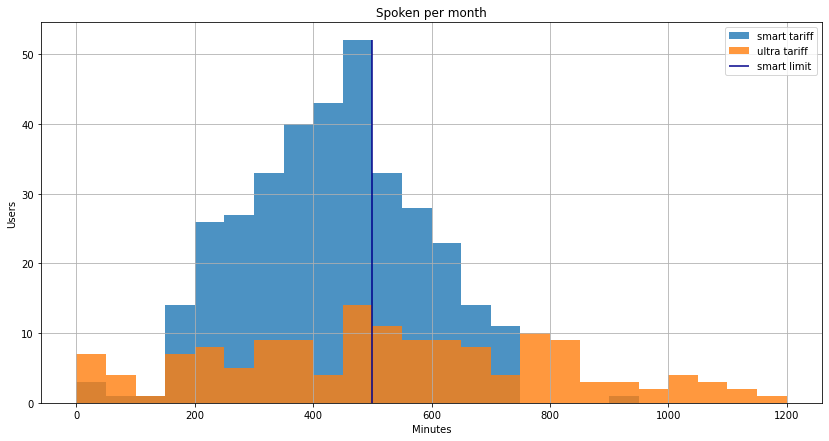

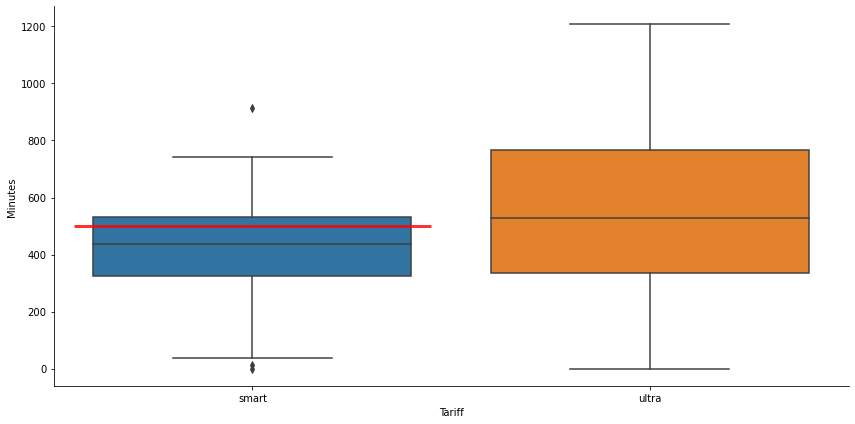

In [21]:
bins_list = []
create_bins_range(bins_list, 0, 1200, 50)

plot = user_data_smart['spoken_per_month'].plot(label='smart tariff', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8, 
                                           title='Spoken per month')
plot = user_data_ultra['spoken_per_month'].plot(label='ultra tariff', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8)

plot2 = sns.catplot(data=user_data, x='tariff', y='spoken_per_month', order=['smart', 'ultra'], kind='box', height=6, 
                    aspect=2, legend_out=False)

plot.vlines(500, 0, 52, color='darkblue', label='smart limit')
plot.legend(loc=1)
plot2.axes[0][0].hlines(y=500, color='red', linewidth=3, alpha=0.8, xmin=-0.45, xmax=0.45, label='Tariff minutes limit') 
plot.set_xlabel('Minutes'), plot.set_ylabel('Users');
plot2.set_axis_labels(x_var='Tariff', y_var='Minutes');

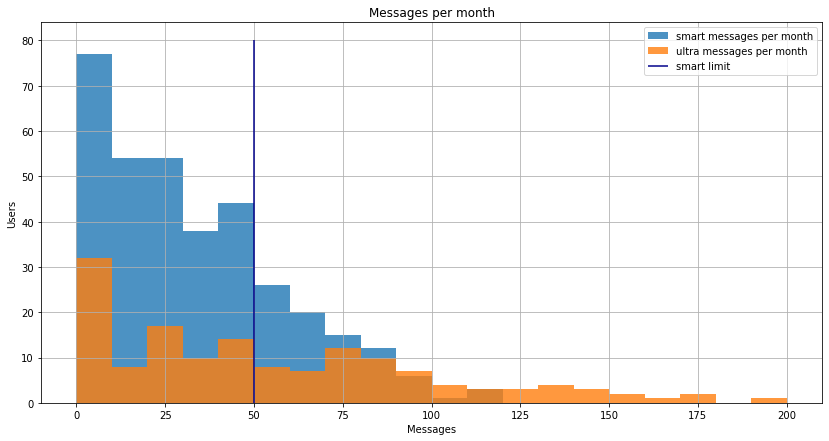

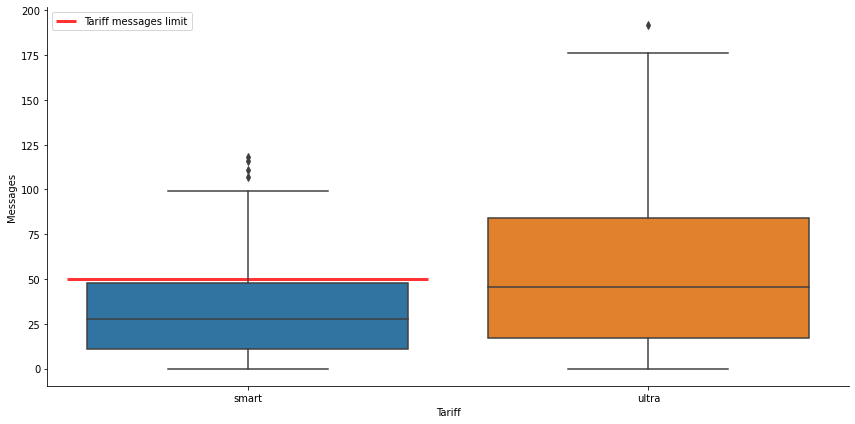

In [22]:
bins_list = []
create_bins_range(bins_list, 0, 200, 10)

plot = user_data_smart['messages_per_month'].plot(label='smart messages per month', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8,
                                           title='Messages per month')
plot = user_data_ultra['messages_per_month'].plot(label='ultra messages per month', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8)

plot2 = sns.catplot(data=user_data, x='tariff', y='messages_per_month', order=['smart', 'ultra'], kind='box', height=6, 
                    aspect=2, legend_out=False)

plot.vlines(50, 0, 80, color='darkblue', label='smart limit')
plot.legend(loc=1)
plot2.axes[0][0].hlines(y=50, color='red', linewidth=3, alpha=0.8, xmin=-0.45, xmax=0.45, label='Tariff messages limit') 
plot2.ax.legend(loc=2)
plot.set_xlabel('Messages'), plot.set_ylabel('Users');
plot2.set_axis_labels(x_var='Tariff', y_var='Messages');

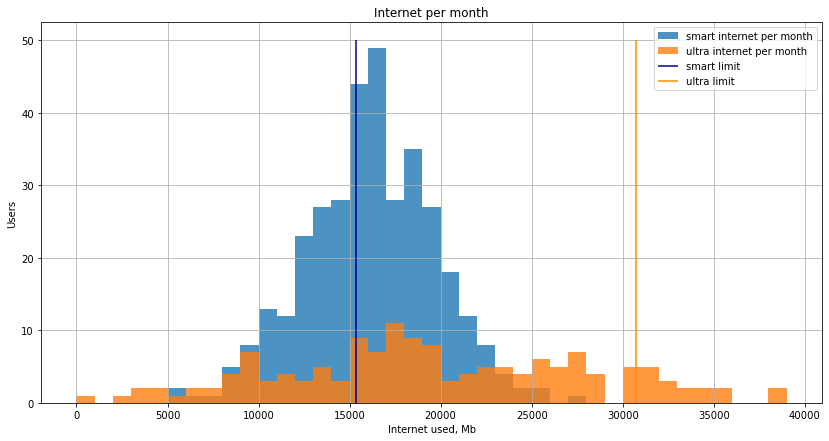

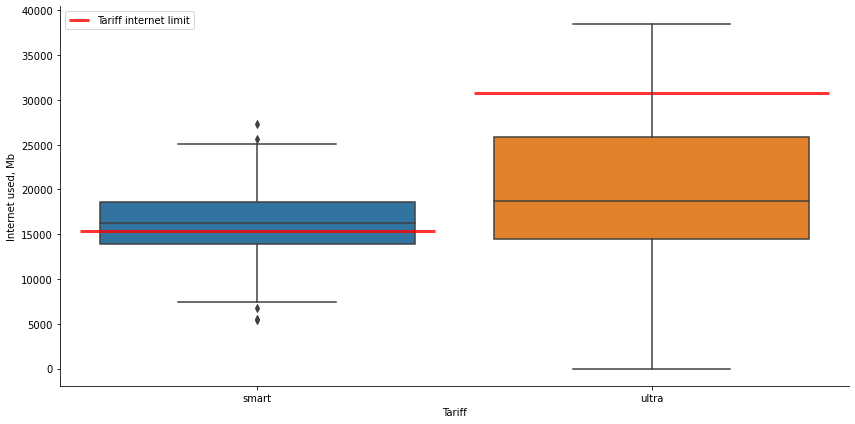

In [23]:
bins_list = []
create_bins_range(bins_list, 0, 39000, 1000)

plot = user_data_smart['internet_per_month'].plot(label='smart internet per month', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8,
                                           title='Internet per month')
plot = user_data_ultra['internet_per_month'].plot(label='ultra internet per month', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8)

plot2 = sns.catplot(data=user_data, x='tariff', y='internet_per_month', order=['smart', 'ultra'], kind='box', height=6, 
                    aspect=2, legend_out=False)

plot.vlines(15*1024, 0, 50, color='darkblue', label='smart limit')
plot.vlines(30*1024, 0, 50, color='darkorange', label='ultra limit')
plot.legend(loc=1)
plot2.axes[0][0].hlines(y=15*1024, color='red', linewidth=3, alpha=0.8, xmin=-0.45, xmax=0.45, label='Tariff internet limit') 
plot2.axes[0][0].hlines(y=30*1024, color='red', linewidth=3, alpha=0.8, xmin=0.55, xmax=1.45) 
plot2.ax.legend(loc=0)
plot.set_xlabel('Internet used, Mb'), plot.set_ylabel('Users');
plot2.set_axis_labels(x_var='Tariff', y_var='Internet used, Mb');

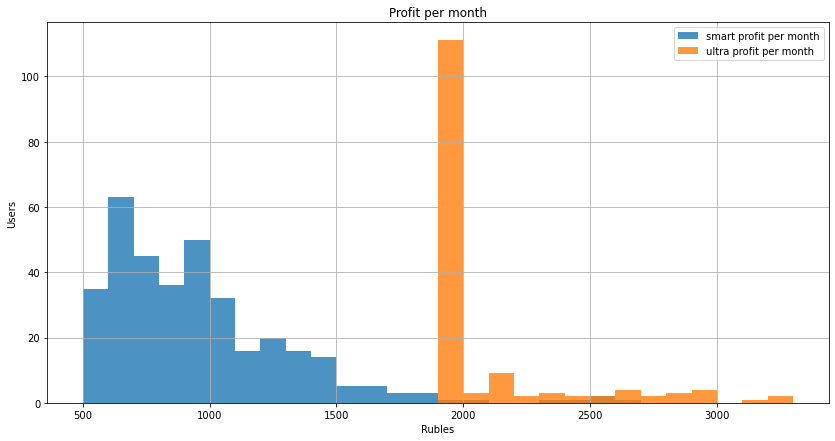

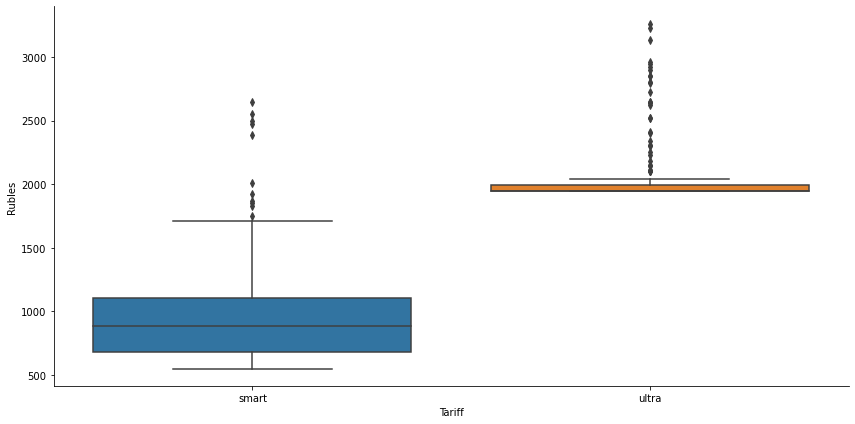

In [24]:
bins_list = []
create_bins_range(bins_list, 500, 3300, 100)

plot = user_data_smart['profit_per_month'].plot(label='smart profit per month', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8,
                                           title='Profit per month')
plot = user_data_ultra['profit_per_month'].plot(label='ultra profit per month', kind='hist', bins=bins_list,
                                           figsize=(14,7), legend=True, grid=True, alpha=0.8)

plot2 = sns.catplot(data=user_data, x='tariff', y='profit_per_month', order=['smart', 'ultra'], kind='box', height=6, 
                    aspect=2, legend_out=False)
plot.set_xlabel('Rubles'), plot.set_ylabel('Users');
plot2.set_axis_labels(x_var='Tariff', y_var='Rubles');

In [25]:
user_data_stats_by_tariff = {
    'Stats' : ['mean', 'dispersion', 'standard deviation'], 
    'spoken_smart' : [user_data_smart['spoken_per_month'].mean(), np.var(user_data_smart['spoken_per_month']), 
                      user_data_smart['spoken_per_month'].describe()[2]], 
    'spoken_ultra' : [user_data_ultra['spoken_per_month'].mean(), np.var(user_data_ultra['spoken_per_month']), 
                      user_data_ultra['spoken_per_month'].describe()[2]],
    'messages_smart' : [user_data_smart['messages_per_month'].mean(), np.var(user_data_smart['messages_per_month']), 
                        user_data_smart['messages_per_month'].describe()[2]],
    'messages_ultra' : [user_data_ultra['messages_per_month'].mean(), np.var(user_data_ultra['messages_per_month']), 
                        user_data_ultra['messages_per_month'].describe()[2]],
    'internet_smart_gb' : [user_data_smart['internet_per_month'].mean()/1024, 
                           np.var(user_data_smart['internet_per_month'])/1024, 
                           user_data_smart['internet_per_month'].describe()[2]/1024],
    'internet_ultra_gb' : [user_data_ultra['internet_per_month'].mean()/1024, 
                           np.var(user_data_ultra['internet_per_month'])/1024, 
                           user_data_ultra['internet_per_month'].describe()[2]/1024]}

user_data_stats_by_tariff = pd.DataFrame(user_data_stats_by_tariff)
user_data_stats_by_tariff

,Stats,spoken_smart,spoken_ultra,messages_smart,messages_ultra,internet_smart_gb,internet_ultra_gb
0,mean,431.146966,541.980498,32.352078,54.030743,15.821668,19.133632
1,dispersion,22082.357162,83021.734669,700.901596,2135.302923,12505.652982,67123.133126
2,standard deviation,148.814080,289.113314,26.512448,46.366246,3.499649,8.123783


##### Среднемесячное кол-во истраченных минут: 
- По тарифу smart:
Среднее количество истраченных минут в месяц по одному клиенту составляет 430 минут. Большинство пользователей тратят на разговоры от 325 до 530 минут в месяц. При этом 31% пользователей тарифа не вписываются в изначальные 500 минут и тратят дополнительные оплачиваемые минуты.
- По тарифу ultra:
Среднее количество истраченных минут в месяц по одному клиенту составляет 540 минут.Большинство пользователей тратят на разговоры от 335 до 770 минут в месяц. Всем пользователям из предоставленной выборки с огромным запасом хватает 3000 минут, которые входят в базовую стоимость тарифа.

Стандартное отклонение по пользователям тарифа ultra почти в 2 раза больше, чем у пользователей тарифа smart. На графике довольно наглядно видно: у пользователей тарифа smart более выражен пик и распределение близко к нормальному, когда у пользователей тарифа ultra распределение "размазано" и нет явно выраженной моды.

##### Среднемесячное количество отправленных сообщений:
- По тарифу smart:
Среднее количество отправленных сообщений по одному клиенту составляет 32. Большинство пользователей отправляют от 11 до 48 сообщения в месяц. При этом 23% пользователей тарифа не хватает 50 сообщений, которые входят в базовые условия тарифа. 
- По тарифу ultra:
Среднее количество отправленных сообщений по одному клиенту составляет 54. Большинство пользователей отправляют от 17 до 84 сообщений в месяц. Всем пользователям из предоставленной выборки с огромным запасом хватает 1000 сообщений, которые входят в стоимость тарифа.

##### Среднемесячный объем трафика интернета:
- По тарифу smart:
Средний объем использованного трафика в месяц по одному клиенту составляет 15,8 Гб. Большинство пользователей тратят от 13,6 до 18 Гб трафика. При этом 62% пользователей тарифа не хватает 15 Гб, которые входят в тариф.
- По тарифу ultra:
Средний объем использованного трафика в месяц по одному клиенту составляет 19 Гб. Большинство пользователей тратят от 14 до 25 Гб трафика. При этом 11% пользователей тарифа не хватает 30 Гб, которые входят в тариф.

### Проверяю гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [26]:
print('H0: Средняя выручка пользователей тарифа «Ультра»  == Средняя выручка пользователей тарифа «Смарт»')
print('H1: Средняя выручка пользователей тарифа «Ультра»  != Средняя выручка пользователей тарифа «Смарт»')
print('Выборки независимы, поэтому использую метод ttest_ind')

H0: Средняя выручка пользователей тарифа «Ультра»  == Средняя выручка пользователей тарифа «Смарт»
H1: Средняя выручка пользователей тарифа «Ультра»  != Средняя выручка пользователей тарифа «Смарт»
Выборки независимы, поэтому использую метод ttest_ind


In [27]:
print('H0: Дисперсия d1 == Дисперсия d2')
print('H1: Дисперсия d1 != Дисперсия d2')

d1 = user_data_smart['profit_per_month'].describe()[2]**2
d2 = user_data_ultra['profit_per_month'].describe()[2]**2
df1 = len(user_data_smart['profit_per_month']) - 1 
df2 = len(user_data_ultra['profit_per_month']) - 1

alpha = 0.05

results = st.f.sf(d1/d2, df1, df2)
results

print('p-значение:', results)

if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Использую equal_var = False')

H0: Дисперсия d1 == Дисперсия d2
H1: Дисперсия d1 != Дисперсия d2
p-значение: 0.00856098044015154
Отвергаем нулевую гипотезу
Использую equal_var = False


In [28]:
smart_profit = list(user_data_smart['profit_per_month'])
ultra_profit = list(user_data_ultra['profit_per_month'])

alpha = 0.01

results = st.ttest_ind(smart_profit, ultra_profit, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4887931713090467e-116
Отвергаем нулевую гипотезу


In [29]:
print('H0: Средняя выручка пользователей из Москвы  == Средняя выручка пользователей из других регионов')
print('H1: Средняя выручка пользователей из Москвы  != Средняя выручка пользователей из других регионов')
print('Выборки независимы, поэтому использую метод ttest_ind')

H0: Средняя выручка пользователей из Москвы  == Средняя выручка пользователей из других регионов
H1: Средняя выручка пользователей из Москвы  != Средняя выручка пользователей из других регионов
Выборки независимы, поэтому использую метод ttest_ind


In [30]:
print('H0: Дисперсия d1 == Дисперсия d2')
print('H1: Дисперсия d1 != Дисперсия d2')

d1 = user_data[user_data['city'] == 'Москва']['profit_per_month'].describe()[2]**2
d2 = user_data[user_data['city'] != 'Москва']['profit_per_month'][2]**2
df1 = len(user_data_smart['profit_per_month']) - 1 
df2 = len(user_data_ultra['profit_per_month']) - 1

alpha = 0.05

results = st.f.sf(d1/d2, df1, df2)
results

print('p-значение:', results)

if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Использую equal_var = True')

H0: Дисперсия d1 == Дисперсия d2
H1: Дисперсия d1 != Дисперсия d2
p-значение: 0.9999999999999999
Не получилось отвергнуть нулевую гипотезу
Использую equal_var = True


In [31]:
moscow_profit = list(user_data[user_data['city'] == 'Москва']['profit_per_month'])
regions_profit = list(user_data[user_data['city'] != 'Москва']['profit_per_month'])

alpha = 0.05

results = st.ttest_ind(moscow_profit, regions_profit)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9356467703685524
Не получилось отвергнуть нулевую гипотезу


In [32]:
smart_profit = sorted(list(round(user_data_smart['profit_per_month'], -1)))

smart_profit_prob_dict = {}
smart_profit_set = set(smart_profit)

for i in smart_profit_set:
    smart_profit_prob_dict.update({i : smart_profit.count(i)/len(smart_profit)})

expectation = sum(int(i)*smart_profit_prob_dict[i] for i in smart_profit_prob_dict)

print(expectation, user_data_smart['profit_per_month'].mean())

952.8571428571425 952.8584403215833


In [33]:
ttl_users_smart, ttl_users_ultra = user_data_smart['profit_per_month'].count(), user_data_ultra['profit_per_month'].count()
ttl_mean_smart, ttl_mean_ultra = user_data_smart['profit_per_month'].mean(), user_data_ultra['profit_per_month'].mean()
profit_per_month_smart, profit_per_month_ultra = ttl_users_smart*ttl_mean_smart, ttl_users_ultra*ttl_mean_ultra

print(f'Smart пользователи: {ttl_users_smart/(ttl_users_smart+ttl_users_ultra):.0%},\
 Ultra пользователи: {ttl_users_ultra/(ttl_users_smart+ttl_users_ultra):.0%}')
print(f'Smart выручка: {profit_per_month_smart:.0f}, Ultra выручка:{profit_per_month_ultra:.0f}')
print(ttl_mean_smart, ttl_mean_ultra)

Smart пользователи: 70%, Ultra пользователи: 30%
Smart выручка: 333500, Ultra выручка:308938
952.8584403215833 2087.4174417924414


##### Гипотеза 1:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

H0: Средняя выручка пользователей тарифа «Ультра»  == Средняя выручка пользователей тарифа «Смарт»

H1: Средняя выручка пользователей тарифа «Ультра»  != Средняя выручка пользователей тарифа «Смарт»

Выборки независимы, поэтому использую метод ttest_ind

Дисперсия существенно различается (на 44%), поэтому буду использовать equal_var = False

p-значение: 2.9526328149882275e-117; Нулевая гипотеза отвергнута

##### Гипотеза 2:
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

H0: Средняя выручка пользователей из Москвы  == Средняя выручка пользователей из других регионов

H1: Средняя выручка пользователей из Москвы  != Средняя выручка пользователей из других регионов

Выборки независимы, поэтому использую метод ttest_ind

Дисперсия существенно не различается (на 8%), поэтому буду использовать equal_var = True

p-значение: 0.946651548615169; Не получилось отвергнуть нулевую гипотезу

### Вывод

В ходе исследования перспективности тарифа для телеком компании были изучены полученные данные, посчитаны данные по активности каждого пользователя, выручке по каждому пользователю и собраны в один файл. Проведен сравнительный анализ активности пользователей тарифа smart и ultra и проверены две гипотезы. 

#### Краткое сравнение пользовательской активности по тарифам:

##### Среднемесячное кол-во истраченных минут:

smart - 430 минут, ultra - 540 минут.
31% пользователей тарифа smart не вписываются в изначальные 500 минут и тратят дополнительные оплачиваемые минуты.
Всем пользователям тарифа ultra с огромным запасом хватает 3000 минут, которые входят в базовую стоимость тарифа.

##### Среднемесячное кол-во отправленных сообщений:

smart - 32 сообщения, ultra - 54 сообщения. 
23% пользователей тарифа smart не хватает 50 сообщений, которые входят в тариф.
Всем пользователям тарифа ultra с огромным запасом хватает 1000 сообщений, которые входят в базовую стоимость тарифа.

##### Среднемесячный объем трафика:

smart - 15,8Гб,, ultra - 19 Гб. 
62% пользователей тарифа smart не хватает 15 Гб, которые входят в тариф.
11% пользователей тарифа ultra не хватает 30 Гб, которые входят в тариф.

#### Выручка:

Средняя выручка по пользователю тарифа ultra составила 2087 руб. в месяц, а по тарифу smart 947 руб., что в 2,2 раза больше.
Привлекая 5 новых пользователей к тарифу ultra ожидаемая выручка будет равна 11ти привлеченным пользователям smart. 
При корректировке рекламного бюджета, рекомендую сделать акцент на тариф ultra, в связи с его лучшей отдачи по прибыли с каждого нового привлеченного клиента.